In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

# import custom modules
from custom_libs import db
from custom_libs import preprocessing
from custom_libs import classification
from custom_libs import dump

## Loading del dataset e Preprocessing

In [2]:
df = db.get_dataset("chat_dataset")
df.head(2)

,message,sentiment
0,I really enjoyed the movie,positive
1,The food was terrible,negative


In [5]:
x_column_name = "message"
x_column_cleaned_name = x_column_name + "_clean"

In [6]:
proprocessing_function = preprocessing.preprocess_text
preprocessing.preprocess_dataframe(df, x_column_name, proprocessing_function)
df.head(2)

,message,sentiment,message_clean
0,I really enjoyed the movie,positive,really enjoyed movie
1,The food was terrible,negative,food terrible


In [7]:
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEGATIVE if x == "negative" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.POSITIVE if x == "positive" else x)
df['sentiment'] = df['sentiment'].apply(
    lambda x: classification.Sentiment.NEUTRAL if x == "neutral" else x)

df.sample(5)

,message,sentiment,message_clean
436,I'm loving this new hobby I picked up ð¨,Positive,loving new hobby picked
220,I have no strong opinion about this,Neutral,strong opinion
91,The food was outstanding,Positive,food outstanding
269,The food was ordinary,Neutral,food ordinary
420,I'm feeling a bit lost without a plan ð,Neutral,feeling bit lost without plan


## Cose delle Classificazioni

In [8]:
classification.append_sentiment_for_each_row(df, x_column_cleaned_name, new_column_name='sentiment')
df.head(3)

,message,sentiment,message_clean
0,I really enjoyed the movie,Positive,really enjoyed movie
1,The food was terrible,Negative,food terrible
2,I'm not sure how I feel about this,Positive,sure feel


In [17]:
X, y = df[x_column_cleaned_name], df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
vectorizers = list()
vectorizers.append(CountVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english'))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2)))
vectorizers.append(TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3)))

models = [PassiveAggressiveClassifier, LogisticRegression, MultinomialNB, SVC]

classification.test_classifiers(models, vectorizers, x_train, x_test, y_train, y_test)

Accuracy for PassiveAggressiveClassifier with vectorizer 0: 0.8803418803418803
Accuracy for PassiveAggressiveClassifier with vectorizer 1: 0.8717948717948718
Accuracy for PassiveAggressiveClassifier with vectorizer 2: 0.8547008547008547
Accuracy for PassiveAggressiveClassifier with vectorizer 3: 0.8632478632478633
Accuracy for PassiveAggressiveClassifier with vectorizer 4: 0.8632478632478633


Accuracy for LogisticRegression with vectorizer 0: 0.8376068376068376
Accuracy for LogisticRegression with vectorizer 1: 0.8205128205128205
Accuracy for LogisticRegression with vectorizer 2: 0.8205128205128205
Accuracy for LogisticRegression with vectorizer 3: 0.7863247863247863
Accuracy for LogisticRegression with vectorizer 4: 0.7777777777777778


Accuracy for MultinomialNB with vectorizer 0: 0.8205128205128205
Accuracy for MultinomialNB with vectorizer 1: 0.8376068376068376
Accuracy for MultinomialNB with vectorizer 2: 0.8376068376068376
Accuracy for MultinomialNB with vectorizer 3: 0.80341880

Accuracy: 0.8717948717948718
Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.81      0.79        21
     Neutral       0.88      0.78      0.82        36
    Positive       0.90      0.95      0.93        60

    accuracy                           0.87       117
   macro avg       0.85      0.85      0.85       117
weighted avg       0.87      0.87      0.87       117

Confusion matrix, without normalization


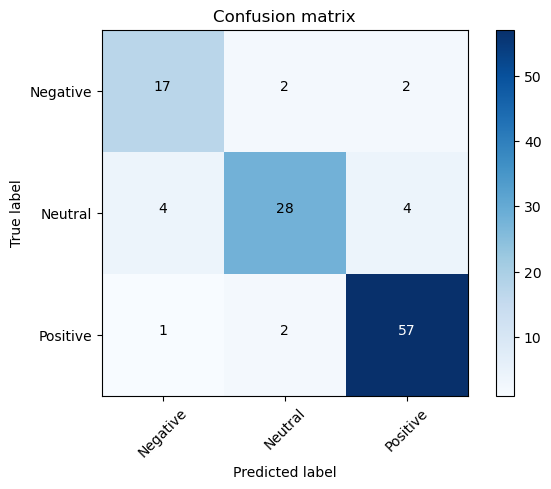

In [20]:
# Best combination of model and vectorizer
vectorizer = CountVectorizer(stop_words='english')
x_train_trasformed = vectorizer.fit_transform(x_train)
x_test_trasformed = vectorizer.transform(x_test)

class_names = classification.Sentiment.get_all()
model = classification.test_classifier(PassiveAggressiveClassifier, x_train_trasformed, x_test_trasformed, y_train, y_test, class_names)

In [21]:
dump.save_model(model, "model_chat")
dump.save_vectorizer(vectorizer, "vectorizer_chat")

Saving model at: dump_models/model_chat.pkl
Saving vectorizer at: dump_models/vectorizer_chat.pkl
